# 粒子フィルタ（Particle Filter）の実装

参照：http://d.hatena.ne.jp/teramonagi/20120411/1334153387

In [4]:
library('RcppSMC')

Warning message:
“package ‘RcppSMC’ was built under R version 3.3.2”

サンプルデータの生成．
simGaussian関数は「線形・ガウシアン状態空間モデル」に従うシミュレーション値を返してくれる．
式で書くと，
$x_t = x_{t-1} + v_t,y_t = x_t + w_t$
となる．

In [8]:
sim <- simGaussian(len = 10)
head(sim)

$state
 [1] -0.71032033 -0.46814210 -0.08644322  1.37291022  2.50479712  2.29199721
 [7]  2.31165592  2.92081130  2.49356843  1.47685223

$data
 [1] -0.3992147 -1.5557956  1.2803721  2.8945968  1.8444907  1.7817131
 [7]  1.6117165  5.7788655  2.2366460  1.0253567

stateが状態x，dataが観測yに対応している．

dataを用いてstateを予測するのはblockpfGaussianOpt関数

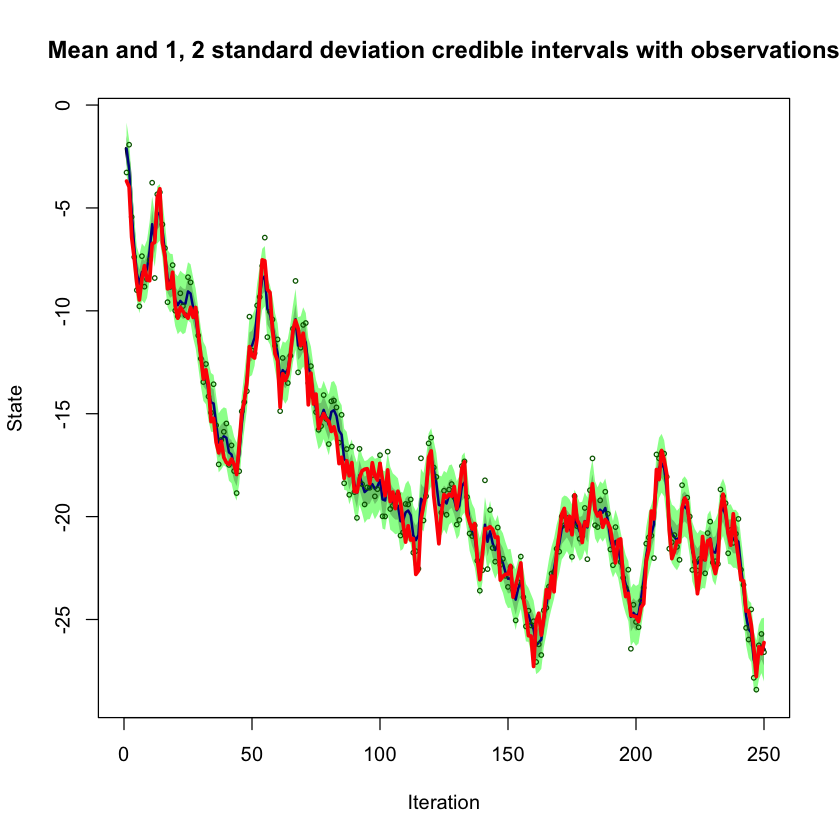

In [9]:
sim <- simGaussian(len = 250)
res <- blockpfGaussianOpt(sim$data, particles = 1000, lag = 5, plot = TRUE)
lines(sim$state, lty = 1, lwd = 3, col = 'red')

誤差の計算

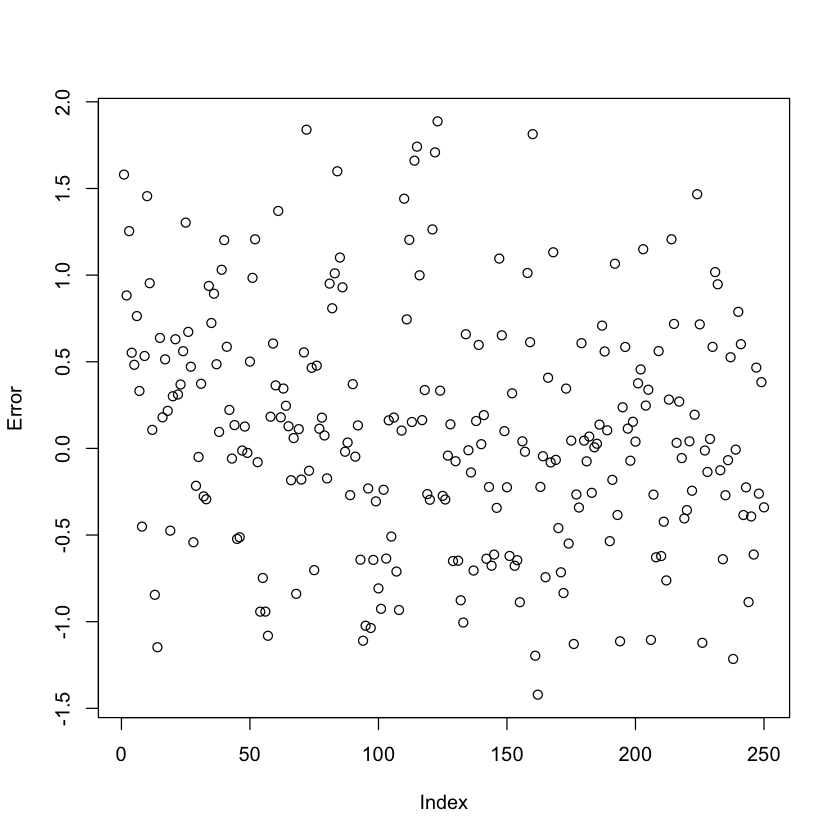

In [10]:
error <- as.numeric(t(res$weight) %*% res$values / sum(res$weight)) - sim$state
plot(error, ylab ="Error")